# What Does the Bifurcation Map Look Like?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def logistic(r, x):
    return r*x*(1 - x)

iters = 1000 # of iterations for each r value
pts = 1000 # of r values
r_val = np.linspace(1, 4, pts)  # Range of r values

In [3]:
bifurc = []

for r in r_val:
    x = np.random.rand()  # Generating a random number between 0 and 1
    for i in range(iters):
        x = logistic(r, x)
        if i > iters // 2:
            bifurc.append([r, x])

bifurc = np.array(bifurc)

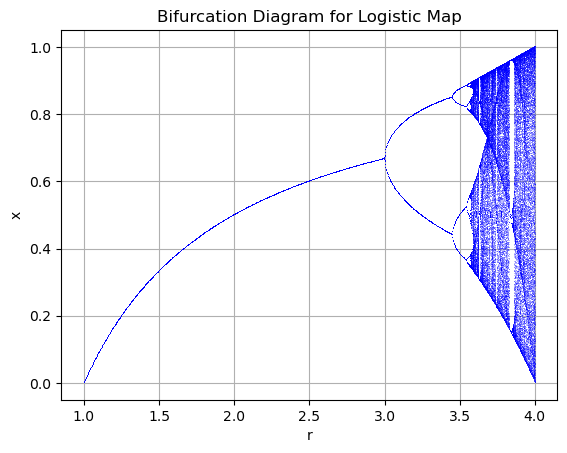

In [4]:
# Plot
plt.plot(bifurc[:, 0], bifurc[:, 1], ',b', alpha=0.25)
plt.xlabel('r')
plt.ylabel('x')
plt.title('Bifurcation Diagram for Logistic Map')
plt.grid('True')
plt.show()

# Lyapunov Exponent for a Logistic Map

In [5]:
def lyapunov(r, n, transient):
    x = 0.49
    l_sum = 0
    # Transient iterations
    for i in range(transient):
        x = logistic(r, x)
    # Main iterations
    for i in range(n):
        x = logistic(r, x)
        l_sum += np.log(abs(r - 2*r*x))
    return l_sum/n

In [6]:
l = []
r = np.linspace(2.5, 4, 1000)
for i in r:
    ly = lyapunov(i, 1000, 200)
    l.append(ly)

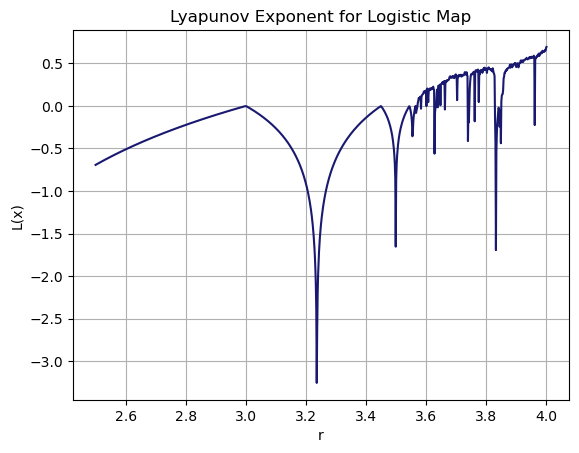

In [7]:
plt.plot(r, l, c = 'midnightblue')
plt.xlabel('r')
plt.ylabel('L(x)')
plt.title('Lyapunov Exponent for Logistic Map')
plt.grid('True')
plt.show()

# 2D Maps

### Coupled Logistic Maps

In [8]:
def clog(x, y, r1, r2, e):
    x_next = (1 + e) * r1 * x * (1 - x) + e * (x - y)
    y_next = (1 + e) * r2 * y * (1 - y) + e * (y - x)
    x_next = np.clip(x_next, -1e5, 1e5)
    y_next = np.clip(y_next, -1e5, 1e5)
    return x_next, y_next

In [9]:
def ly2D(r1, r2, e, initial_x, initial_y, n_iterations, n_transients):
    x, y = initial_x, initial_y
    le_sum = np.zeros(2)
    
    v1 = np.array([1, 0])
    v2 = np.array([0, 1])
    
    for i in range(n_transients):
        x, y = clog(x, y, r1, r2, e)

    for i in range(n_iterations):
        x, y = clog(x, y, r1, r2, e)
        J = np.array([[(1 + e) * r1 * (1 - 2 * x) + e, -e],
                      [-e, (1 + e) * r2 * (1 - 2 * y) + e]])
        
        v1 = np.dot(J, v1)
        v2 = np.dot(J, v2)
        
        # Gram-Schmidt Orthogonalisation
        v2 -= (np.dot(v1, v2) / np.dot(v1, v1)) * v1
        
        # Normalisation
        v1_norm = np.linalg.norm(v1)
        v2_norm = np.linalg.norm(v2)
        if v1_norm == 0 or v2_norm == 0:
            return np.array([np.nan, np.nan])
        v1 /= v1_norm
        v2 /= v2_norm

        le_sum[0] += np.log(v1_norm)
        le_sum[1] += np.log(v2_norm)
    
    le_sum /= n_iterations
    return le_sum

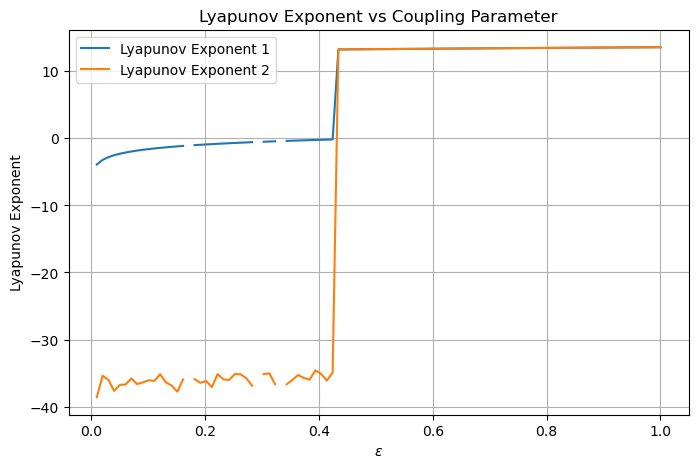

In [16]:
# Parameters
r1 = 2
r2 = 2
initial_x = 0.2
initial_y = 0.9
n_iterations = 1000
n_transients = 200
e_values = np.linspace(0, 1, 100)

le = np.array([ly2D(r1, r2, e, initial_x, initial_y, n_iterations, n_transients) for e in e_values])

plt.figure(figsize = (8, 5))
plt.plot(e_values, le[:, 0], label="Lyapunov Exponent 1")
plt.plot(e_values, le[:, 1], label="Lyapunov Exponent 2")
plt.ylabel('Lyapunov Exponent')
plt.xlabel(r'$\epsilon$')
plt.title(r'Lyapunov Exponent vs Coupling Parameter')
plt.grid(True)
plt.legend()
plt.show()

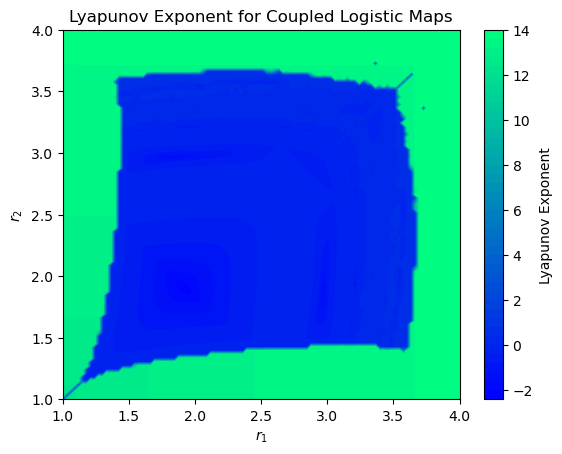

In [17]:
e = 0.1  # epsilon

initial_x, initial_y = 0.1, 0.1
n_iterations = 1000
n_transients = 200
r1_vals = np.linspace(1, 4, 100)
r2_vals = np.linspace(1, 4, 100)
ly22 = np.zeros((len(r1_vals), len(r2_vals)))

for i, r1 in enumerate(r1_vals):
    for j, r2 in enumerate(r2_vals):
        le = ly2D(r1, r2, e, initial_x, initial_y, n_iterations, n_transients)
        ly22[i, j] = le[0]  # Storing the largest Lyapunov exponent

R1, R2 = np.meshgrid(r1_vals, r2_vals)
plt.contourf(R1, R2, ly22.T, levels=50, cmap='winter')
plt.colorbar(label='Lyapunov Exponent')
plt.xlabel(r'$r_1$')
plt.ylabel(r'$r_2$')
plt.title('Lyapunov Exponent for Coupled Logistic Maps')
plt.show()

### Henon Map

In [21]:
def henon_map(x, y, a, b):
    x_next = 1 - a * x**2 + y
    y_next = b * x
    return x_next, y_next

In [22]:
def ly_henon(a, b, initial_x, initial_y, n_iterations, n_transients):
    x, y = initial_x, initial_y
    le_sum = np.zeros(2)
    
    v1 = np.array([1, 0])
    v2 = np.array([0, 1])
    
    for i in range(n_transients):
        x, y = henon_map(x, y, a, b)

    for i in range(n_iterations):
        x, y = henon_map(x, y, a, b)
        J = np.array([[-2 * a * x, 1],
                      [b, 0]])
        
        v1 = np.dot(J, v1)
        v2 = np.dot(J, v2)
        
        v2 -= (np.dot(v1, v2) / np.dot(v1, v1)) * v1
        
        v1_norm = np.linalg.norm(v1)
        v2_norm = np.linalg.norm(v2)
        v1 /= v1_norm
        v2 /= v2_norm
        
        le_sum[0] += np.log(v1_norm)
        le_sum[1] += np.log(v2_norm)
    
    le_sum /= n_iterations
    return le_sum

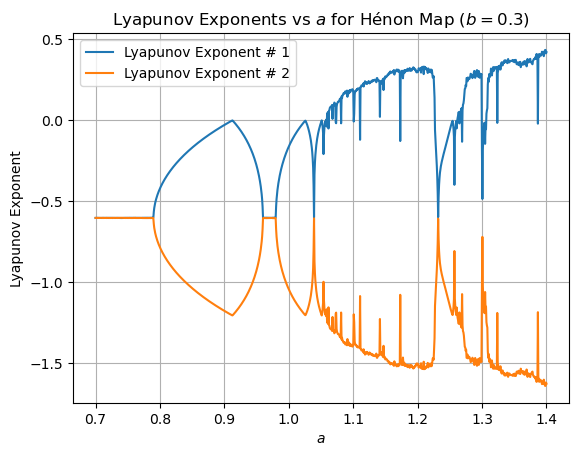

In [23]:
initial_x, initial_y = 0.5, -0.1
n_iterations = 2000
n_transients = 1000
a_vals = np.linspace(0.7, 1.4, 1000)
b = 0.3
lyh1 = []
lyh2 = []

# for a in a_vals:
    # le = ly_henon(a, b, initial_x, initial_y, n_iterations, n_transients)
    # lyh.append(le[0])
    
for a in a_vals:
    le = ly_henon(a, b, initial_x, initial_y, n_iterations, n_transients)
    lyh1.append(le[0])  
    lyh2.append(le[1]) 

plt.plot(a_vals, lyh1, label='Lyapunov Exponent # 1')
plt.plot(a_vals, lyh2, label='Lyapunov Exponent # 2')
plt.xlabel(r'$a$')
plt.ylabel('Lyapunov Exponent')
plt.title(r'Lyapunov Exponents vs $a$ for Hénon Map ($b = 0.3$)')
plt.legend()
plt.grid(True)
plt.show()